In [1]:
### Pick the file directory
FILES_DIR = '/media/ab/data/Research_Data/Matthias/fullModel_divergent-classifications/sorted/'

In [4]:
### This cell imports the data from the text files and creates the graphs for each file
### The main output is the all_data dict, which uses the filename as the key, and then contains an array of arrays
### with the stats for each position

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import csv
import sys
from scipy import stats
import matplotlib.ticker as mtick

### Initiate lists of variables for later use

def main():  
    all_data = dict()
    default_val = '0'
    positive_val = '1'
    directory = FILES_DIR
    print "Input directory is: ", directory
    dir_list = sorted(os.listdir(directory))
    print "dirlist: ", dir_list
    for filename in dir_list:
        if filename == 'wgEncodeSydhTfbs_motifProximity_1500bp.sorted.bed':      ### Load only the TSV files
            all_data[filename], motifs = load_from_file(directory+filename)
            #print "length of all data: ", len(all_data)
            print "length of data: ", len(all_data[filename])
            #print "position chr4:59448596-59448990 : ", len(all_data[filename]['chr4:59448596-59448990'])
            #print "position chr4:59448596-59448990 : ", (all_data[filename]['chr4:59448596-59448990'])
            unique_motifs = set(motifs)
            #matrix=make_matrix(x,y,default_val)
            num_positions = len(all_data[filename])
            
            save_matrix(all_data[filename], default_val, positive_val, motifs, directory, filename)
            
    '''
    for key  in sorted(all_data.keys()):      
        #print "key: ", key
        mu, sigma, lambda_, log_likelihood, pi = get_data_for_graphs(all_data[key])
        make_graphs(key, mu, sigma, lambda_, log_likelihood, pi)
    '''
    
    #print all_data
def save_matrix(data, no, yes, motifs, dr, fn):
    
    # Save the line data to an output text file in the same directory as
    # the graphs

    # Create writer
    ofile  = open(dr+fn+'.matrix', "wb")
    writer = csv.writer(ofile, delimiter='\t')

    # Add the headers
    #headers = graph_settings['headers']
    #for i in motifs:
    #    headers.append(i)
    #print 'headers: ', headers
    header = ['Position']
    header = header + motifs
    writer.writerow(header)
    #print 'data', line_data[0]
    # Write the data
    for i in data.keys():
        row = [i]
        row = row + ([no] * len(motifs))
        for j in data[i]:
            index = header.index(j)
            row[index] = yes
        writer.writerow(row)
    writer.writerow('')

    # Close the file
    ofile.close()
    return
    
def load_from_file(file_to_open):    

    x=open(file_to_open)   ### Open the file
    data = dict()                    ### Initiate the data list
    motifs = []
    for line in x:               ### For each line in the file x
        split_line = line.split('\t')
        bidir_position = split_line[0].strip('\n') + ':' + split_line[1].strip('\n') + '-' + split_line[2].strip('\n')
        if len(split_line) > 4:
            motif = split_line[7].strip('\n')
        else:
            motif = 'None'
        if (bidir_position in data.keys()):
            if (motif not in data[bidir_position].keys()):
                data[bidir_position][motif] = True
                #data[bidir_position]['None'] = True
        else:
            data[bidir_position] = dict()
            data[bidir_position][motif] = True
        if motif not in motifs:
            motifs.append(motif)
    x.close()
    return (data, motifs)            
 

if __name__ == "__main__":
    sys.exit(main())

Input directory is:  /media/ab/data/Research_Data/Matthias/fullModel_divergent-classifications/sorted/
dirlist:  ['FL0_fullModel-1_divergent_classifications.sorted.bed', 'FL1_fullModel-1_divergent_classifications.sorted.bed', 'FL6_fullModel-1_divergent_classifications.sorted.bed', 'WT0_divClass_wgEncodeSydhTfbs_motifs_2500bp.bed', 'WT0_divClass_wgEncodeSydhTfbs_motifs_2500bp.bed.matrix', 'WT0_divClass_wgEncodeSydhTfbs_motifs_50bp.bed', 'WT0_fullModel-1_divergent_classifications.sorted.bed', 'WT1_fullModel-1_divergent_classifications.sorted.bed', 'WT6_fullModel-1_divergent_classifications.sorted.bed', 'output.txt', 'wgEncodeSydhTfbs_motifProximity_100bp.sorted.bed', 'wgEncodeSydhTfbs_motifProximity_100bp.sorted.bed.matrix', 'wgEncodeSydhTfbs_motifProximity_1500bp.sorted.bed']
length of data:  50211


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


Input directory is:  /media/ab/data/Research_Data/Matthias/fullModel_divergent-classifications/sorted/
dirlist:  ['FL0_fullModel-1_divergent_classifications.sorted.bed', 'FL1_fullModel-1_divergent_classifications.sorted.bed', 'FL6_fullModel-1_divergent_classifications.sorted.bed', 'WT0_divClass_wgEncodeSydhTfbs_motifs_2500bp.bed', 'WT0_divClass_wgEncodeSydhTfbs_motifs_2500bp.bed.matrix', 'WT0_divClass_wgEncodeSydhTfbs_motifs_50bp.bed', 'WT0_divClass_wgEncodeSydhTfbs_motifs_50bp.bed.matrix', 'WT0_fullModel-1_divergent_classifications.sorted.bed', 'WT1_fullModel-1_divergent_classifications.sorted.bed', 'WT6_fullModel-1_divergent_classifications.sorted.bed', 'output.txt', 'wgEncodeSydhTfbs_motifProximity_100bp.sorted.bed', 'wgEncodeSydhTfbs_motifProximity_100bp.sorted.bed.matrix']
length of data:  50211


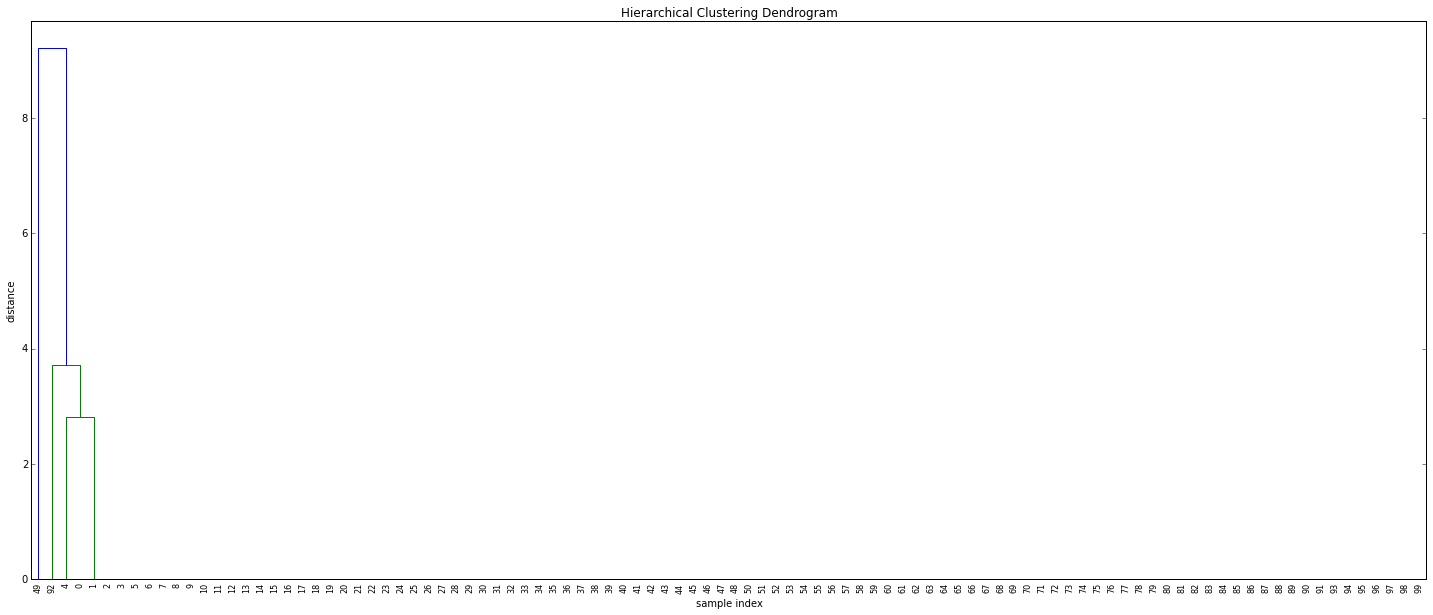

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [7]:
### This cell imports the data from the text files and creates the graphs for each file
### The main output is the all_data dict, which uses the filename as the key, and then contains an array of arrays
### with the stats for each position

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import csv
import sys
from scipy import stats
import matplotlib.ticker as mtick
from scipy.cluster.hierarchy import dendrogram, linkage

### Initiate lists of variables for later use

def main():  
    all_data = dict()
    default_val = int(0)
    positive_val = int(1)
    directory = FILES_DIR
    print "Input directory is: ", directory
    dir_list = sorted(os.listdir(directory))
    print "dirlist: ", dir_list
    for filename in dir_list:
        if filename == 'wgEncodeSydhTfbs_motifProximity_100bp.sorted.bed':      ### Load only the TSV files
            all_data[filename], motifs = load_from_file(directory+filename)
            #print "length of all data: ", len(all_data)
            print "length of data: ", len(all_data[filename])
            #print "position chr4:59448596-59448990 : ", len(all_data[filename]['chr4:59448596-59448990'])
            #print "position chr4:59448596-59448990 : ", (all_data[filename]['chr4:59448596-59448990'])
            unique_motifs = set(motifs)
            #matrix=make_matrix(x,y,default_val)
            num_positions = len(all_data[filename])
            
            dataMatrix = save_matrix(all_data[filename], default_val, positive_val, motifs, directory, filename)
            #print dataMatrix
            dataMatrix = dataMatrix[:100]
            hierarchicalClustering(dataMatrix)
    '''
    for key  in sorted(all_data.keys()):      
        #print "key: ", key
        mu, sigma, lambda_, log_likelihood, pi = get_data_for_graphs(all_data[key])
        make_graphs(key, mu, sigma, lambda_, log_likelihood, pi)
    '''
    
    #print all_data
def save_matrix(data, no, yes, motifs, dr, fn):
    
    # Save the line data to an output text file in the same directory as
    # the graphs
    matrix = []
    # Create writer
    ofile  = open(dr+fn+'.matrix', "wb")
    writer = csv.writer(ofile, delimiter='\t')

    # Add the headers
    #headers = graph_settings['headers']
    #for i in motifs:
    #    headers.append(i)
    #print 'headers: ', headers
    header = ['Position']
    header = header + motifs
    writer.writerow(header)
    #print 'data', line_data[0]
    # Write the data
    for i in data.keys():
        row = [i]
        row = row + ([no] * len(motifs))
        for j in data[i]:
            index = header.index(j)
            row[index] = yes
        new_row = row[1:]
        writer.writerow(row)
        matrix.append(new_row)
    writer.writerow('')

    # Close the file
    ofile.close()
    return np.matrix(matrix)
    
def load_from_file(file_to_open):    

    x=open(file_to_open)   ### Open the file
    data = dict()                    ### Initiate the data list
    motifs = []
    for line in x:               ### For each line in the file x
        split_line = line.split('\t')
        bidir_position = split_line[0].strip('\n') + ':' + split_line[1].strip('\n') + '-' + split_line[2].strip('\n')
        if len(split_line) > 4:
            motif = split_line[7].strip('\n')
        else:
            motif = 'None'
        if (bidir_position in data.keys()):
            if (motif not in data[bidir_position].keys()):
                data[bidir_position][motif] = True
                #data[bidir_position]['None'] = True
        else:
            data[bidir_position] = dict()
            data[bidir_position][motif] = True
        if motif not in motifs:
            motifs.append(motif)
    x.close()
    return (data, motifs)            

def hierarchicalClustering(dataMatrix):
    
    # generate the linkage matrix
    Z = linkage(dataMatrix, 'ward')
    
    # calculate full dendrogram
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.show()

if __name__ == "__main__":
    sys.exit(main())

Graphs are ordered: mu, sigma, lambda, pi


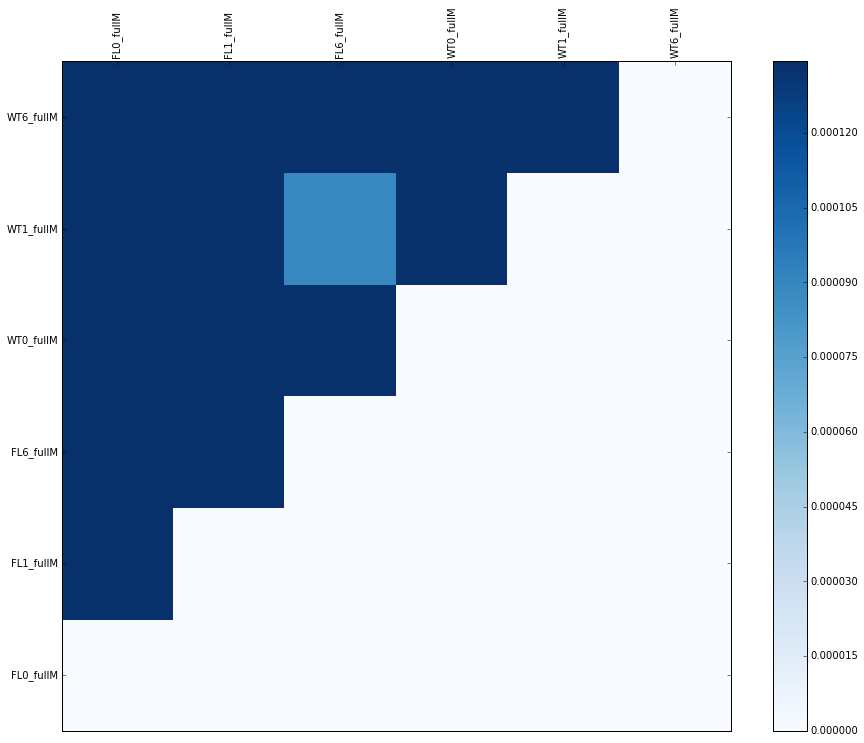

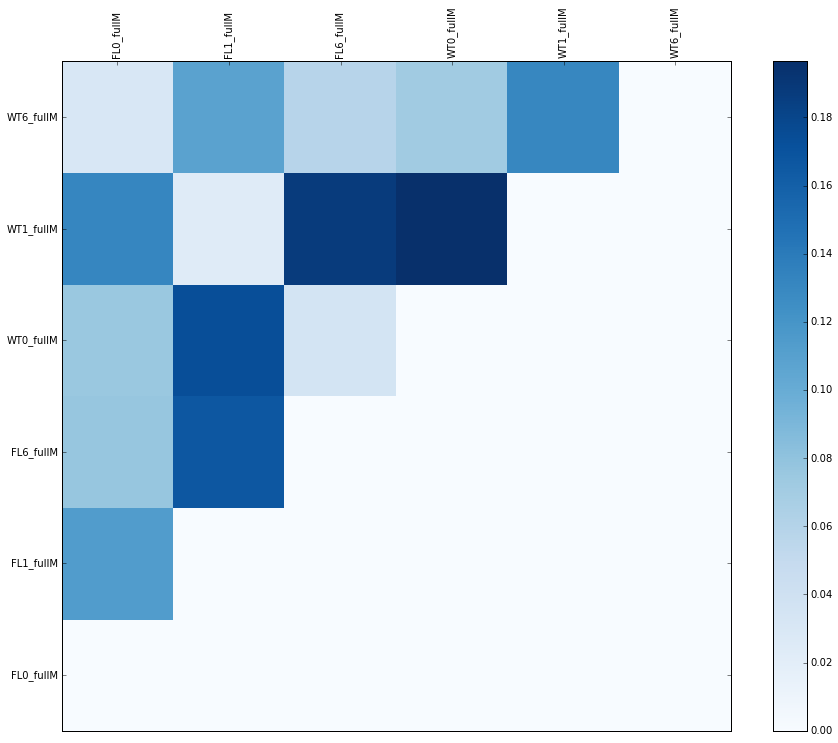

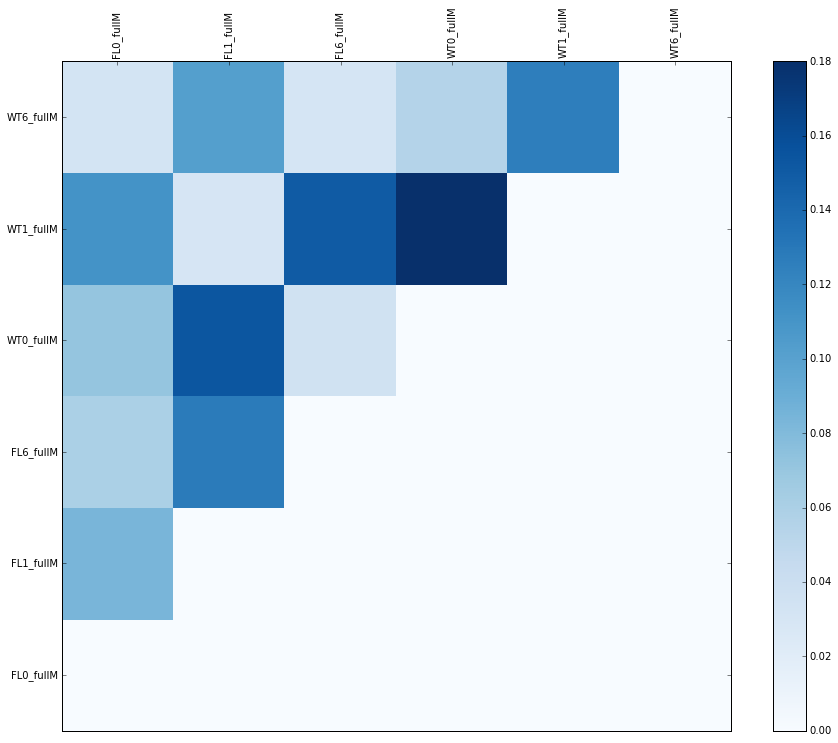

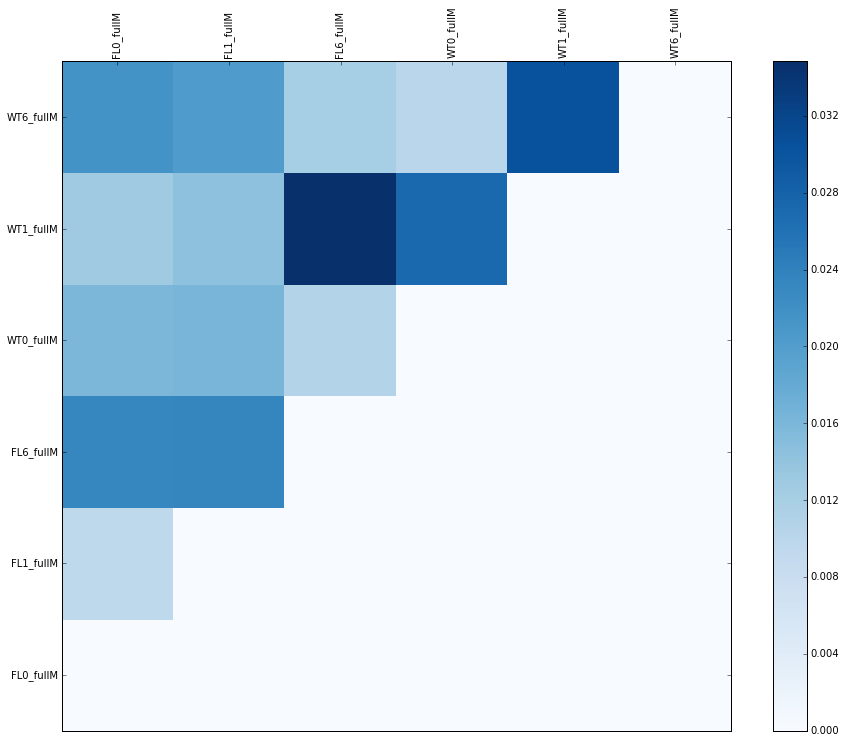

In [3]:

def get_data_for_graphs(data):              
    lambda_ = []                 ### Init the list of all lambda values
    sigma = []                   ### Init the list of all sigma values
    mu = []                      ### Init the list of all mu values
    log_likelihood = []          ### Init the list of all log_likelihood values
    pi = []                      ### Init the list of all pi values

    for position in data:               ### For each interval, copy the statistics to a separate list
        lambda_.append(float(position[7]))
        sigma.append(float(position[6]))
        mu.append(float(position[5]))
        log_likelihood.append(float(position[4]))
        pi.append(float(position[8]))
        #mu_pi.append((float(position['model_1']['mu_k']), float(position['model_1']['pi_k'])))
    
    return (mu, sigma, lambda_, log_likelihood, pi)
        
        
def make_graphs(filename, x1, x2, x3, x4, x5):
    ### Calculate the number of bins for the histogram
    x1_bins = len(x1) / 1000
    x2_bins = len(x2) / 100
    x3_bins = len(x3) / 100
    x4_bins = len(x4) / 100
    x5_bins = len(x5) / 100
    #print x1_bins, x2_bins, x3_bins, x4_bins, x5_bins

    ### Make the five histogram axes for the plot
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

    ### Add the data to the histograms
    ax1.hist(x1, x1_bins, normed=1, histtype='bar', color='green')
    ax1.set_title('mu')
    ax2.hist(x2, x2_bins, normed=1, histtype='bar', color='red', log=True)
    ax2.set_title('sigma')
    ax2.locator_params(axis='x',nbins=4)            
    ax3.hist(x3, x3_bins, normed=1, histtype='bar', color='blue', log=True)
    ax3.set_title('lambda_')
    ax3.locator_params(axis='x',nbins=4)
    ax4.hist(x4, x4_bins, normed=1, histtype='bar', color='yellow', log=True)
    ax4.set_title('log-liklihood')
    ax4.locator_params(axis='x',nbins=4)
    #ax4.set_xscale("log")
    ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    ax5.hist(x5, x5_bins, normed=1, histtype='bar', color='orange')
    ax5.set_title('pi')

    ### Add a title to the plot
    fig.suptitle(filename, y=1.02, fontsize=18)

    ### Set the layout and show the plot
    plt.tight_layout()
    plt.show()
    

def inf_to_zero(value):
    if (float(value) == float('inf')) or (-float(value) == float('inf')):
        #print "inf removed", value
        return 0
    else:
        return value